In [1]:
import pandas as pd             #importa a biblioteca pandas e a nomeia para pd
import seaborn as sns           #importa a biblioteca seaborn e a nomeia para sns
import matplotlib.pyplot as plt #importa a biblioteca matplotlib e a nomeia para plt
import numpy as np              #importa a biblioteca numpy e a nomeia para np

In [3]:
df = pd.read_csv("dadosacoes.csv") # df é uma variável que pega todos as informações da
# tabela dados_produtos.csv através do pd.read_csv

df.head() # mostra somente as primeiras linhas da variável df

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [4]:
nomeAcao = np.array(df['nome ação'])
preco = np.array(df['preço ação R$'])
qtdCotas = np.array(df['qtde cotas'])
valorMercado = np.array(df['valor de mercado R$ -(Bilhões)'])


Text(0.5, 0, 'Nome da ação')

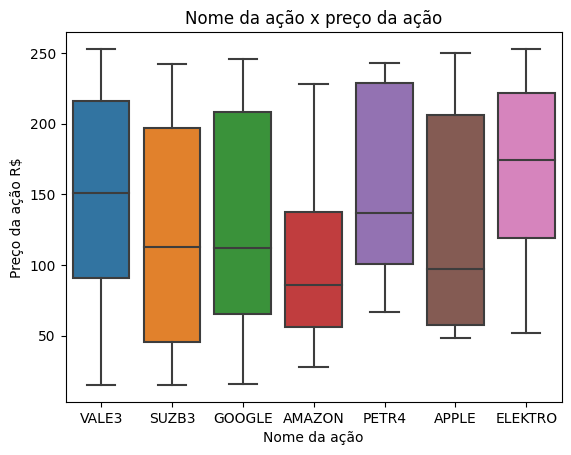

In [5]:
sns.boxplot(x = nomeAcao, y = preco)
plt.title('Nome da ação x preço da ação')
plt.ylabel('Preço da ação R$')
plt.xlabel('Nome da ação')

Text(0.5, 0, 'Nome da ação')

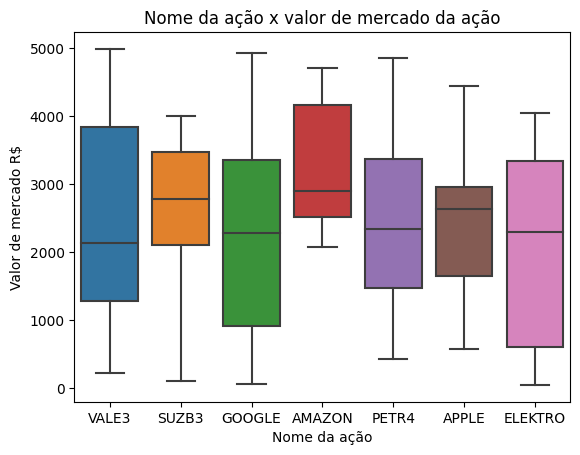

In [6]:
sns.boxplot(x = nomeAcao, y = valorMercado)
plt.title('Nome da ação x valor de mercado da ação')
plt.ylabel('Valor de mercado R$')
plt.xlabel('Nome da ação')

In [7]:
df.info() #exibe informações do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [8]:
df.describe() # fornece informações puramente descritivas sobre o conjunto de dados

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [9]:
from sklearn.cluster import KMeans

In [10]:
df = pd.get_dummies(df,columns=['nome ação'], drop_first=True)
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

c:\Users\yurih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [14]:
sse = kmeans.inertia_ #métrica para avaliar o desempenho do cluster
print(f"SSE: {sse}")

SSE: 13157885.910586081


In [15]:
labels = kmeans.labels_ #armazenar os rotulos dos dados
centroids = kmeans.cluster_centers_ #armazena o centro dos clusteres
df['Cluster'] = kmeans.labels_

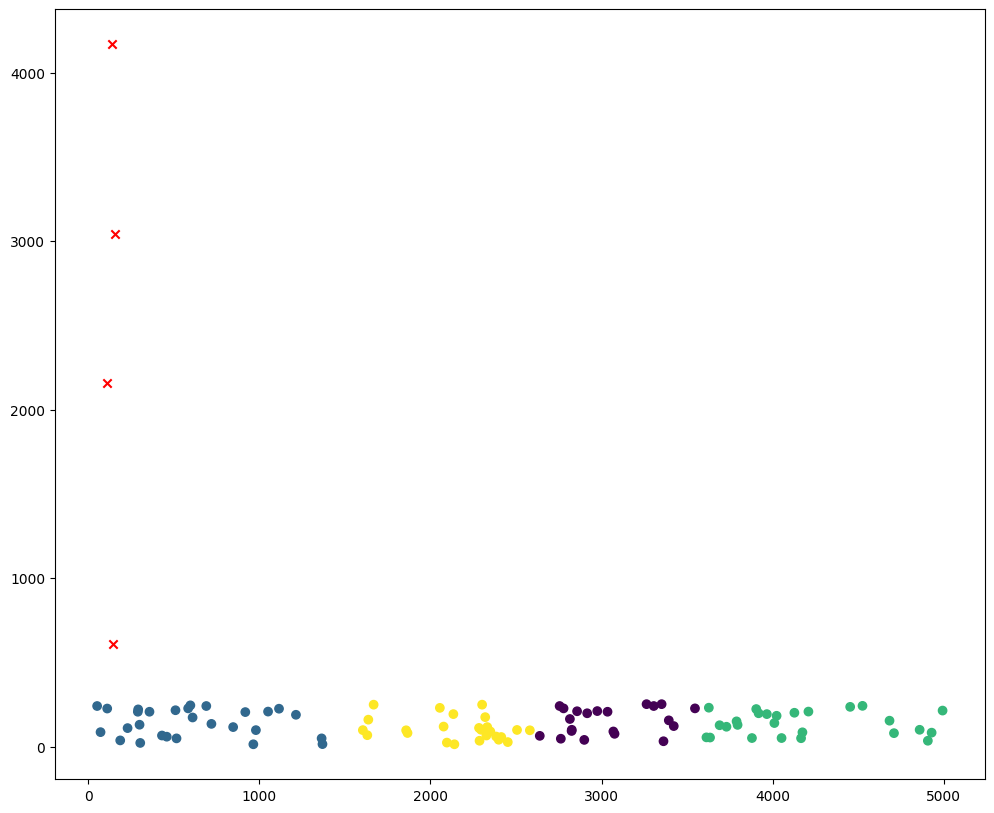

In [16]:
# passo 6 plotar a visualização dos dados
plt.figure(figsize=(12,10))
plt.scatter(valorMercado,preco, c=labels)#plota o graf de dispersão com os clusters
plt.scatter(centroids[:,0],centroids[:,2], marker='x',color='red')
plt.show()

SSE: 8688546.539718613


c:\Users\yurih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


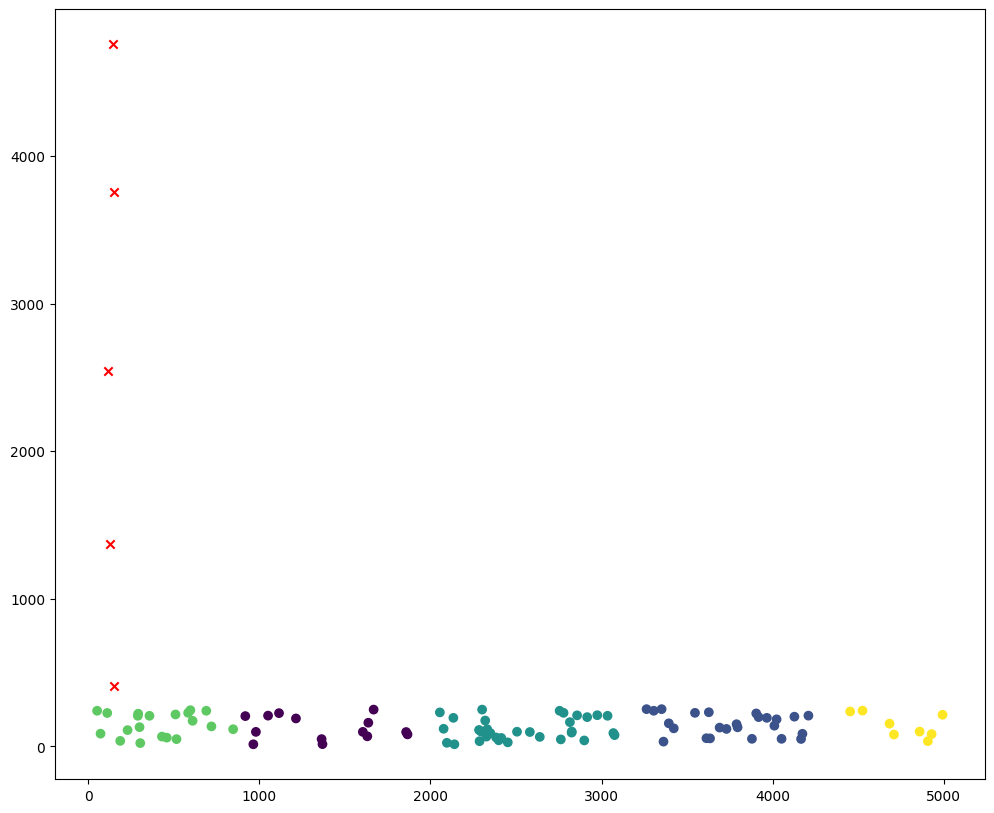

In [17]:
#passo 4 aplicar KMEANS
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)
sse = kmeans.inertia_ #métrica para avaliar o desempenho do cluster
print(f"SSE: {sse}")
labels = kmeans.labels_ #armazenar os rotulos dos dados
centroids = kmeans.cluster_centers_ #armazena o centro dos clusteres

plt.figure(figsize=(12,10))
plt.scatter(valorMercado,preco, c=labels)#plota o graf de dispersão com os clusters
plt.scatter(centroids[:,0],centroids[:,2], marker='x',color='red')
plt.show()

SSE: 3006877.0490753655


c:\Users\yurih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


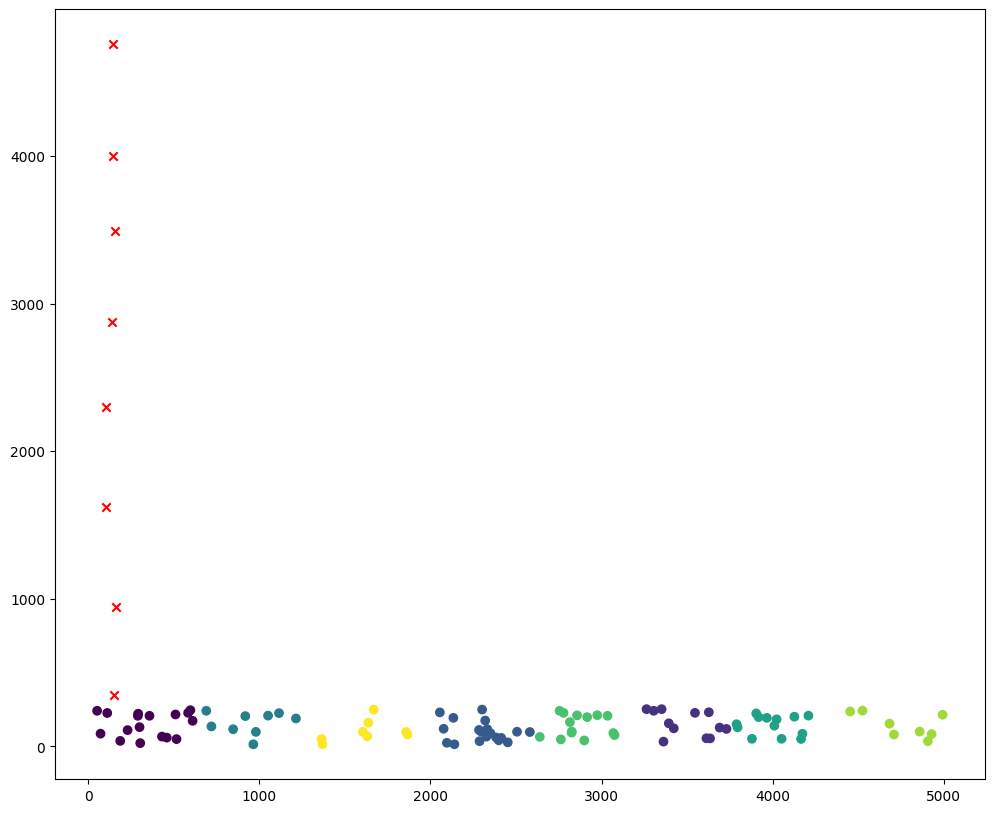

In [18]:
#passo 4 aplicar KMEANS
kmeans = KMeans(n_clusters=8)
kmeans.fit(df)
sse = kmeans.inertia_ #métrica para avaliar o desempenho do cluster
print(f"SSE: {sse}")
labels = kmeans.labels_ #armazenar os rotulos dos dados
centroids = kmeans.cluster_centers_ #armazena o centro dos clusteres

plt.figure(figsize=(12,10))
plt.scatter(valorMercado,preco, c=labels)#plota o graf de dispersão com os clusters
plt.scatter(centroids[:,0],centroids[:,2], marker='x',color='red')
plt.show()

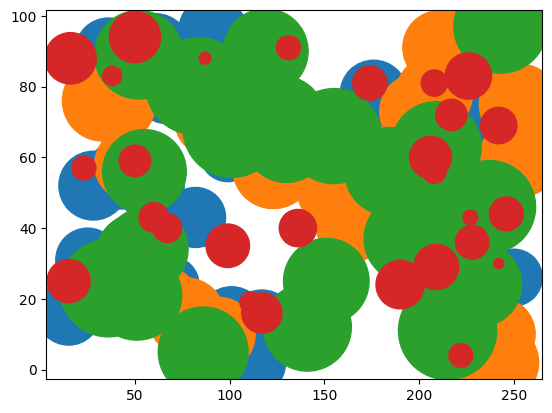

In [19]:
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['preço ação R$'], cluster_data['qtde cotas'], cluster_data['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')

plt.show()